In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.drop(["step", "nameOrig", "nameDest", "type"], axis=1, inplace=True)

In [13]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0
3,181.00,181.0,0.00,21182.0,0.0,1,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [15]:
df.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

c:\Users\LENOVO\Desktop\ML_Projects\Machine-Learning\FraudDetection\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [34]:
import pickle as pkl 

pkl.dump(model, open("model.pkl", "wb"))

In [21]:
y_predict = model.predict(X_test)  

In [22]:
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
3737323,0,0
264914,0,0
85647,0,0
5899326,0,0
2544263,0,0
3494160,0,0
2331654,0,0
1414955,0,0
2938135,0,0
6133806,0,0


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9983256373422689


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1903794    2557]
 [    639    1796]]


Text(95.72222222222221, 0.5, 'True Label')

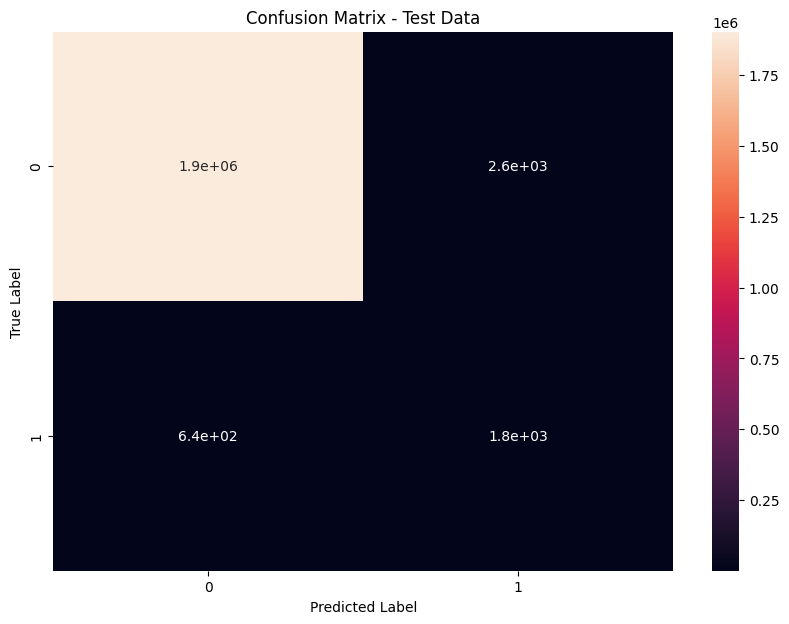

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.41      0.74      0.53      2435

    accuracy                           1.00   1908786
   macro avg       0.71      0.87      0.76   1908786
weighted avg       1.00      1.00      1.00   1908786



In [29]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [30]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.737577002053388


In [31]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.4125890190673099


In [32]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9986586940180481


In [33]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.9983256373422689
